## Analizando datos de un caso de negocio de telecomunicaciones

Se importan las librerías necesarias

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datasets:
**Maestro_Clientes.csv**

In [118]:
df_maestro_clientes = pd.read_csv('Maestro_Clientes.csv', index_col=0,sep=';')
print('Se leyo un dataset de dimensiones {}'.format(df_maestro_clientes.shape))

Se leyo un dataset de dimensiones (5000, 6)


In [119]:
df_maestro_clientes.head()

,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA
CLIENT_ID,,,,,,
0,F,999,1,S,LIMA,47.903088
1,M,26,1,C,LIMA,50.414563
2,F,35,1,NaN,LIMA,49.516079
3,M,30,1,V,LIMA,48.304420
4,F,65,1,NaN,LIMA,49.493112


**Datos_Clientes.csv**

In [120]:
df_data_clientes =  pd.read_csv('Datos_Clientes.csv', index_col=0,sep=';')
print('Se leyo un dataset de dimensiones {}'.format(df_data_clientes.shape))

Se leyo un dataset de dimensiones (5000, 11)


In [121]:
df_data_clientes.head()

,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,
0,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,0
1,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,1
2,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,2
3,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,0
4,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,0


## **Data Understanding**

Se tiene a disposición dos tablas:

1.   Base con todos los clientes de una compañia y algunos datos demográficos.
2.   Base con la información de comportamiento de los clientes.

La base Maestro_Clientes.csv tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Género: (M) para masculino, (F) para femenino.
*   Edad: edad (años cumplidos) del cliente.
*   NSE: nivel socioecónomico del cliente.
*   Estado civil: (S) soltero, (C) casado, (V) viudo.
*   Departamento: lugar de residencia declarada por el cliente.

La base Datos_Clientes.csv tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Renta: renta básica del plan.
*   Uso_SMS: número de SMS enviados en el mes.
*   Deuda_Ant: deuda facturada en el mes anterior.
*   Min_callcenter: minutos de llamadas al centro de atención.
*   Antiguedad: antiguedad del cliente (en meses).
*   Uso_MB: total de MB consumidos en el periodo.
*   Deuda_Act: deuda facturada en el mes.
*   Uso_APP: MB consumidas en el APP de la operadora.
*   Min_Ent_3M: cantidad de llamadas recibidas por el cliente en los últimos 3 meses.
*   Min_Sal_3M: cantidad de llamadas realizadas por el cliente en los últimos 3 meses.
*   Churn: si es diferente de 0, hizo churn en el mes.


In [122]:
# A continuación, se procederá a unir los dataframes para trabajar de mejor manera
df_clientes_final = pd.merge(df_maestro_clientes, df_data_clientes, left_index=True, right_index=True)
print(df_clientes_final.shape)

# También podemos exportar esta unión con el fin de guardar la información y no repetir los mismos pasos
df_clientes_final.to_csv('Tablon_clientes.csv',
                         sep=';')

(5000, 17)


In [123]:
df_clientes_final.head()

,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,,,,,,,
0,F,999,1,S,LIMA,47.903088,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,0
1,M,26,1,C,LIMA,50.414563,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,1
2,F,35,1,NaN,LIMA,49.516079,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,2
3,M,30,1,V,LIMA,48.304420,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,0
4,F,65,1,NaN,LIMA,49.493112,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,0


In [124]:
df = df_clientes_final

## **EDA: Exploratory Data Analysis**

Etapa en donde se analizará cada variable del dataset a detalle para eliminar duplicados, cambiar valores NaN, entre otros.

In [125]:
df.dtypes

,0
GENERO,object
EDAD,object
NSE,int64
ESTADOCIVIL,object
DEPARTAMENTO,object
CAPDEUDA,float64
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64


In [126]:
df["EDAD"].value_counts()

,count
EDAD,
63,119
26,118
61,116
31,112
64,111
46,111
16,110
19,108
32,107


Se observa que en la columna "EDAD" se tiene incongruencia ya que este tipo de dato debería ser "int64". Asimismo, se tienen 3 valores con la letra F, esa letra "F" puede referirse a que la persona en cuestión ha fallecido, o por alguna razón se desconoce la edad de esta persona.

In [127]:
# Se procede a buscar los valores no numéricos de la variable EDAD para eliminarlos
filas_interes = df.loc[df.EDAD.str.isnumeric()==False].index.values
df.drop(filas_interes, inplace=True)
df['EDAD'] = df.EDAD.astype(np.int64)

 La variable CHURN trae varios valores: 0 si el cliente ya no forma parte de la base al cierre del mes y valores distintos de 0 en caso contrario. De esta manera, el significado de la variable no es claro. Por ello, se cambiará sus valores por 1 si el cliente abandonó la compañía (ya no forma parte de la base de clientes) y 0 de caso contrario.

In [128]:
df['CHURN'] = np.where(df['CHURN']==0,1,0)

In [129]:
churn_promedio_base = df.CHURN.sum()/df.shape[0]*100
permanencia_promedio_base = 1 - churn_promedio_base
print('La base tiene un promedio de {}%'.format(round(churn_promedio_base,2)))

La base tiene un promedio de 33.2%


Para mayor orden se separarán las variables numéricas

In [130]:
columnas_numericas = df.select_dtypes(include='number').columns.tolist()
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()

df_num = df[columnas_numericas]
df_cat = df[columnas_categoricas]

## Variables numéricas

A continuación se muestra el gráfico de la distribución de la variable CHURN. Como puede observarse, no existe un desbalance fuerte de datos, por lo que no aplicaremos técncias de balanceo en esta ocasión.

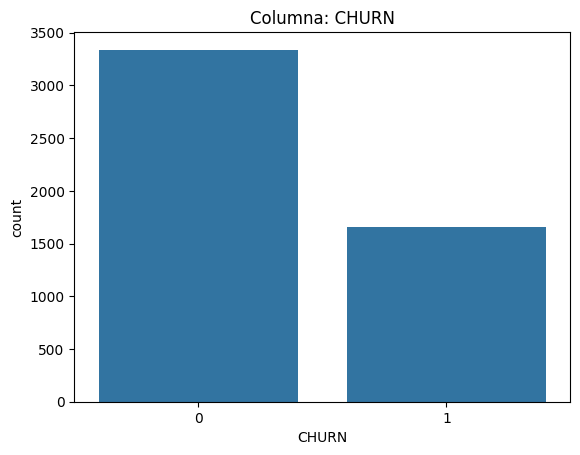

In [132]:
sns.countplot(x='CHURN', data = df_num)
plt.title('Columna: CHURN')
plt.show()

In [133]:
df.CHURN.value_counts()

,count
CHURN,
0,3338
1,1659


Tenemos datos desbalanceados, pero este desbalanceo no es fuerte, por lo que no será necesario técnicas de balanceo.

A continuación, se muestra el histograma de la variable RENTA

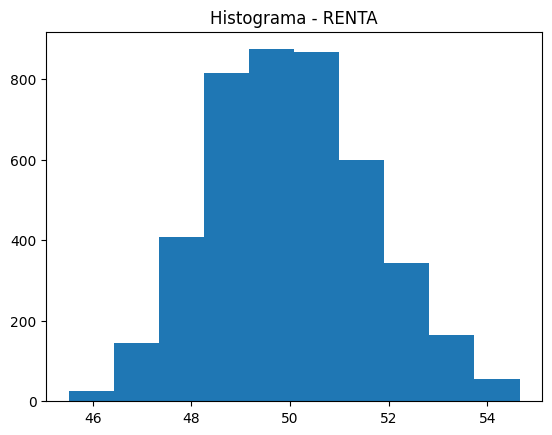

In [166]:
plt.title('Histograma - RENTA')

plt.hist(df_num['RENTA'])

plt.show()

Se observa que el histograma de esta variable se asemeja a una normal por lo que la variabilidad de los datos están condiciones aceptables para usarlo para el desarrollo de un modelo a futuro.

In [134]:
df_num.head()

,EDAD,NSE,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,,,,
0,999,1,47.903088,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,1
1,26,1,50.414563,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,0
2,35,1,49.516079,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,0
3,30,1,48.304420,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,1
4,65,1,49.493112,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,1


In [135]:
df_num.NSE.value_counts()

,count
NSE,
1,4997


Se observa que NSE cuenta con un solo valor (1) por lo que eliminarlo no afectará a un futuro desarrollo de un modelo de Machine Learning.

In [136]:
df_num = df_num.drop(columns=['NSE'])

Identificamos que variables tienen una mayor cantidad de datos vacíos (NaN).

In [137]:
df_num.isna().sum() / len(df_num)

,0
EDAD,0.000000
CAPDEUDA,0.000000
RENTA,0.000000
USO_SMS,0.011807
DEUDA_ANT,0.006004
MIN_CALLCENTER,0.011007
ANTIGUEDAD,0.003602
USO_MB,0.000000
DEUDA_ACT,0.024815
USO_APP,0.518911


In [138]:
df_num = df_num.drop(columns=['USO_APP'])

Para el resto de casos, se empleará medidas de tendencia central para su llenado, tales como la media, mediana y moda.
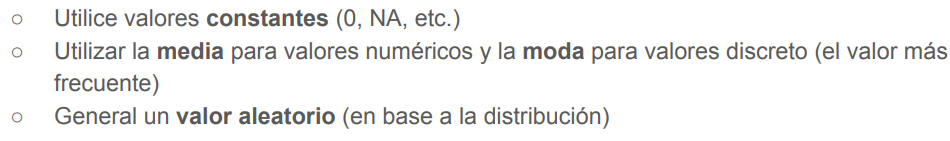

In [139]:
# Variable ANTIGUEDAD
antiguedad_mediana = df_num['ANTIGUEDAD'].median()
df_num['ANTIGUEDAD'] = df_num['ANTIGUEDAD'].fillna(antiguedad_mediana)

# Variable USO_SMS
df_num['USO_SMS'] = df_num['USO_SMS'].fillna(0)

# Variable MIN_CALLCENTER
df_num['MIN_CALLCENTER'] = df_num['MIN_CALLCENTER'].fillna(0)

Adicionalmente, los vacíos también se pueden llenar con algún tipo de información, regla o técnica usada en el negocio. Por ejemplo, cuando hablamos de un plan tarifario, si este no ha variado, entonces el valor de la deuda del mes anterior con el del mes actual deben ser iguales. Por tanto, los vacíos de la columna DEUDA_ACT pueden completarse con los de DEUDA_ANT y viceversa.

In [140]:
df_num.loc[df_num.DEUDA_ACT.isnull(),['DEUDA_ACT']] = df_num['DEUDA_ANT']
# Ubica los registros de df_num donde DEUDA_ACT es nulo y los reemplaza por lo que hay en DEUDA_ANT.

df_num['DEUDA_ANT'] = df_num['DEUDA_ANT'].fillna(df_num['DEUDA_ACT'])

A continuación se muestra la matriz de correlaciones entre variables. Sin considerar la diagonal principal, se puede observar que no existen variables correlacionadas, por lo que no tenemos que eliminar ninguna.

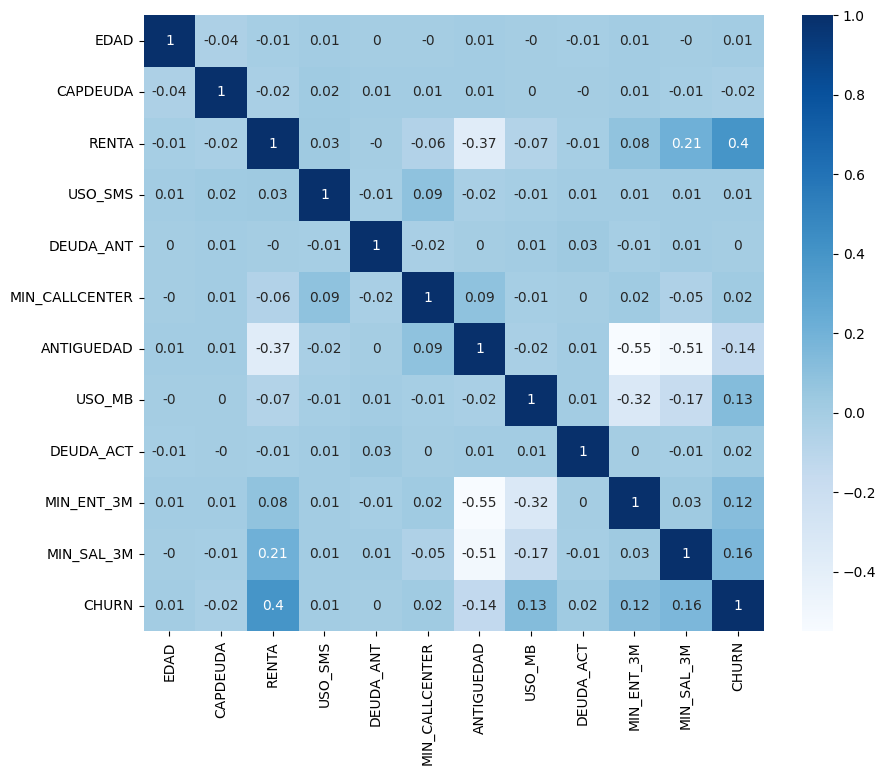

In [141]:
df_corr = df_num.corr().apply(lambda x: round(x,2))

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

Ahora, se procederá a limpiar los valores atípicos. Se puede utilizar un boxplot para eliminar todos los outlier. Sin embargo, también existen otras formas como la imputación o transformaciones como las normalizaciones.

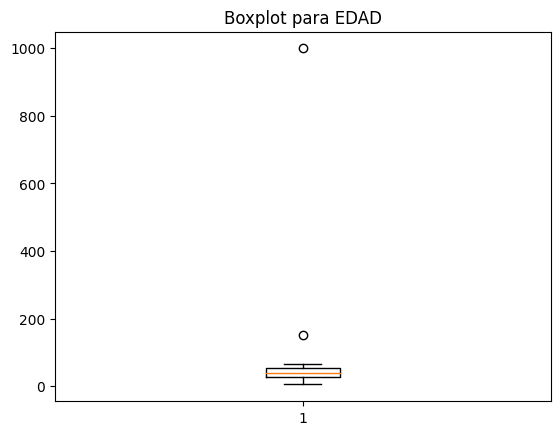

In [142]:
plt.boxplot(df['EDAD'])
plt.title('Boxplot para EDAD')
plt.show()

In [143]:
def eliminar_outliers(df, columna):
    q3 = df[columna].quantile(0.75)
    q1 = df[columna].quantile(0.25)
    iqr = q3 - q1
    return df.loc[(df[columna] < q3 + 1.5*iqr) & (df[columna] > q1 - 1.5*iqr)]

In [144]:
for col in df_num.columns:
    df_num = eliminar_outliers(df_num, col)

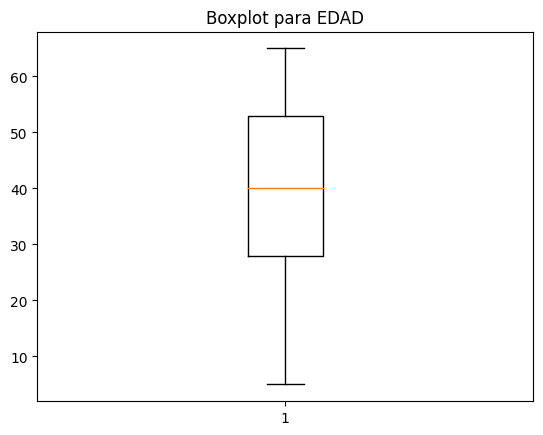

In [145]:
plt.boxplot(df_num['EDAD'])
plt.title('Boxplot para EDAD')
plt.show()

## Variables categóricas

Verificamos los tipos de datos

In [146]:
df_cat.dtypes

,0
GENERO,object
ESTADOCIVIL,object
DEPARTAMENTO,object


In [148]:
df_cat['GENERO'].mode()

,GENERO
0,F


In [149]:
df_cat['ESTADOCIVIL'].nunique()

3

In [150]:
df_cat.isna().sum()

,0
GENERO,50
ESTADOCIVIL,4819
DEPARTAMENTO,0


Completamos los valores vacíos

In [151]:
df_cat['GENERO'] = df_cat['GENERO'].fillna('F')
df_cat['ESTADOCIVIL'] = df_cat['ESTADOCIVIL'].fillna('ND')

<ipython-input-151-4132494549be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['GENERO'] = df_cat['GENERO'].fillna('F')
<ipython-input-151-4132494549be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['ESTADOCIVIL'] = df_cat['ESTADOCIVIL'].fillna('ND')


In [152]:
for col in ['GENERO', 'ESTADOCIVIL', 'DEPARTAMENTO']:
    valores = ','.join(df_cat[col].value_counts().index.values)
    print(f'{col}: {valores}')

GENERO: F,M
ESTADOCIVIL: ND,C,S,V
DEPARTAMENTO: LIMA,AREQUIPA,PASCO,CUSCO,AYACUCHO,TACNA,ICA,JUNIN,PUNO,MOQUEGUA,LORETO,UCAYALI,LA LIBERTAD,PIURA,ANCASH


Categorizamos las variables

In [153]:
df_cat['GENERO'] = pd.Categorical(df_cat['GENERO'],     # Indica la columa a transformar.
                              categories = ['F', 'M'],  # Listado de los posibles valores en la columna.
                              ordered = False)          # True, si la variable es ordinal; False, caso contrario.

df_cat['ESTADOCIVIL'] = pd.Categorical(df_cat['ESTADOCIVIL'],
                              categories = ['ND', 'C', 'S', 'V'],
                              ordered = False)          # True, si la variable es ordinal; False, caso contrario.

df_cat['DEPARTAMENTO'] = pd.Categorical(df_cat['DEPARTAMENTO'],     # Indica la columa a transformar.
                              categories = ['LIMA', 'AREQUIPA', 'PASCO', 'CUSCO', 'AYACUCHO', 'TACNA', 'ICA', 'JUNIN', 'PUNO', 'MOQUEGUA', 'LORETO', 'UCAYALI', 'LA LIBERTAD', 'PIURA', 'ANCASH'],  # Listado de los posibles valores en la columna.
                              ordered = False)          # True, si la variable es ordinal; False, caso contrario.

<ipython-input-153-47f66adbd6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['GENERO'] = pd.Categorical(df_cat['GENERO'],     # Indica la columa a transformar.
<ipython-input-153-47f66adbd6f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['ESTADOCIVIL'] = pd.Categorical(df_cat['ESTADOCIVIL'],
<ipython-input-153-47f66adbd6f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [154]:
df_cat.dtypes

,0
GENERO,category
ESTADOCIVIL,category
DEPARTAMENTO,category


Con las variables categorizadas, se procederá a codificarlas en caso el modelo sea un clasificador, el cual solo lee datos de tipo numérico. Una de las formas de hacer esta codificación es el llamado Label-Encoding.

In [155]:
# Antes
df_cat['DEPARTAMENTO'].head()

,DEPARTAMENTO
CLIENT_ID,
0,LIMA
1,LIMA
2,LIMA
3,LIMA
4,LIMA


In [156]:
from sklearn.preprocessing import LabelEncoder

encoder_departamento = LabelEncoder() # Instancia al encoder
encoder_departamento.fit(df_cat['DEPARTAMENTO']) # "Enseña" a codificar con la data disponible
df_cat['DEPARTAMENTO'] = encoder_departamento.transform(df_cat['DEPARTAMENTO']) # Aplica transformacion "aprendida"

<ipython-input-156-10140f8ab054>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['DEPARTAMENTO'] = encoder_departamento.transform(df_cat['DEPARTAMENTO']) # Aplica transformacion "aprendida"


In [157]:
# Después
df_cat['DEPARTAMENTO'].head()

,DEPARTAMENTO
CLIENT_ID,
0,7
1,7
2,7
3,7
4,7


Otra forma es el One-Hot Encoding

In [158]:
df_cat.head() #Antes

,GENERO,ESTADOCIVIL,DEPARTAMENTO
CLIENT_ID,,,
0,F,S,7
1,M,C,7
2,F,ND,7
3,M,V,7
4,F,ND,7


In [159]:
df_cat = pd.get_dummies(df_cat, columns = ['GENERO'])

In [160]:
# Después
df_cat.head()

,ESTADOCIVIL,DEPARTAMENTO,GENERO_F,GENERO_M
CLIENT_ID,,,,
0,S,7,True,False
1,C,7,False,True
2,ND,7,True,False
3,V,7,False,True
4,ND,7,True,False


Lo mismo se hará para la variable ESTADOCIVIL

In [161]:
df_cat = pd.get_dummies(df_cat, columns = ['ESTADOCIVIL'])

In [162]:
df_cat.head()

,DEPARTAMENTO,GENERO_F,GENERO_M,ESTADOCIVIL_ND,ESTADOCIVIL_C,ESTADOCIVIL_S,ESTADOCIVIL_V
CLIENT_ID,,,,,,,
0,7,True,False,False,False,True,False
1,7,False,True,False,True,False,False
2,7,True,False,True,False,False,False
3,7,False,True,False,False,False,True
4,7,True,False,True,False,False,False


**Con la data ya analizada y modificada y transformada, se procede a guardar los datos en un csv para su posterior uso en la creación de un modelo de Machine Learning.**

In [163]:
df_final = df_num.merge(df_cat, how = 'left', right_index = True, left_index = True)
df_final.shape

(4295, 19)

In [164]:
df_final.drop_duplicates(keep='first', inplace=True) #Se eliminan duplicados

In [165]:
df_final.to_csv('Final_dataset.csv', sep = ',', index = False)